In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

population_salary=pd.read_csv("../../data/Salaries.csv")

# The Bootstrap

Recall that to calculate confidence intervals we need the sampling distribution of  $(\hat\theta-\theta)$.

Intuitively, we can approximate the sampling distribution as follows:
- Draw samples of the same size and using the sample sampling scheme from the population;
- Calculate their $(\hat\theta-\theta)$;
- Obtain the sampling distribution from their aggregation.

For completion, this is the graph we showed in the previous section that illustrates this process for the sampling distribution of $\hat\theta$. 

<img align="center" src="../sampling_dist.png" width="500"/>


The bootstrap method works when we can use our sample as an approximation of the population (the sample size cannot be small for this approximation to work). The schematic below describes the following process:

- Declare the sample to be the "population" (the sample is the "estimated population");
- Draw samples of the same size from the "estimated population"; these samples are drawn with replacement and are called bootstrap samples;
- Calculate the corresponding estimates, $(\hat\theta^b-\hat\theta)$ - note that in our "estimated population", the parameter of interest is $\hat\theta$; we use the superscript **b** to indicate statistics that are calculated from the bootstrap samples;
- Obtain their distribution.

<img align="center" src="./bootstrap.png" width="500"/>

We illustrate the bootstrap method for obtaining an approximate sampling distribution on the salary data where the interest is in the median salary.

In [5]:
# the parameter of interest
theta=population_salary['Annual Salary'].median()

np.random.seed(4321)

# this is a SRS of size n=100
sample_salary=population_salary.sample(100,replace=False)

#the median salary in the sample
theta_hat=sample_salary['Annual Salary'].median()
theta_hat

100644.0

In the above cell code, we generate a sample of size 100. We use this sample to generate an approximation for the sampling distribution of the statistic of interest, $(\hat\theta-\theta)$.

In [7]:
def bootstrap_median(original_sample, label, replications):
    """Simulate sample medians:
    original_sample: df containing the original sample data
    label: label of column containing the variable
    replications: number of bootstrap samples
    Returns array of bootstrap sample medians
    """
    medians = np.array([])
    for i in np.arange(replications):
        bootstrap_sample = original_sample.sample(len(original_sample),replace=True)
        resampled_median = bootstrap_sample['Annual Salary'].median()
        medians = np.append(medians, resampled_median-theta_hat)
        
    return medians

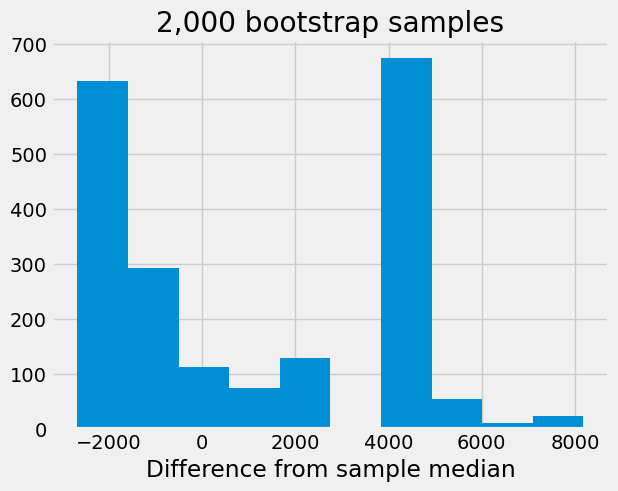

In [18]:
bstrap_medians = bootstrap_median(sample_salary, 'Annual.Salary', 2000)

plt.hist(bstrap_medians,bins=10)
plt.title('2,000 bootstrap samples')
plt.xlabel("Difference from sample median");

Having the sampling distribution for $(\hat\theta-\theta)$, and in particular its percentiles, allow us the construction of the confidence interval. Below we illustrate with a 95% CI:

In [23]:
left = theta_hat-np.percentile(bstrap_medians, 97.5)
right = theta_hat-np.percentile(bstrap_medians,2.5)

# a 95% CI
print([left,right])

[94824.0, 103314.0]
